In [1]:
import numpy as np  
np.random.seed(1337)  # for reproducibility  
  
from keras.datasets import mnist  
from keras.models import Model #泛型模型  
from keras.layers import Dense, Input  
import matplotlib.pyplot as plt  
  
# X shape (60,000 28x28), y shape (10,000, )  
(x_train, _), (x_test, y_test) = mnist.load_data()  

Using TensorFlow backend.


In [2]:
# 数据预处理  
x_train = x_train.astype('float32') / 255. - 0.5       # minmax_normalized  
x_test = x_test.astype('float32') / 255. - 0.5         # minmax_normalized  
x_train = x_train.reshape((x_train.shape[0], -1))  
x_test = x_test.reshape((x_test.shape[0], -1))  
print(x_train.shape)  
print(x_test.shape)  
  

(60000, 784)
(10000, 784)


In [41]:
print (type(x_test))

<class 'numpy.ndarray'>


In [3]:
# 压缩特征维度至2维  
encoding_dim = 2  
  
# this is our input placeholder  
input_img = Input(shape=(784,))  
  
# 编码层  
encoded = Dense(128, activation='relu')(input_img)  
encoded = Dense(64, activation='relu')(encoded)  
encoded = Dense(10, activation='relu')(encoded)  
encoder_output = Dense(encoding_dim)(encoded)  
 
# 解码层  
decoded = Dense(10, activation='relu')(encoder_output)  
decoded = Dense(64, activation='relu')(decoded)  
decoded = Dense(128, activation='relu')(decoded)  
decoded = Dense(784, activation='tanh')(decoded)  

In [4]:
# 构建自编码模型  
autoencoder = Model(inputs=input_img, outputs=decoded)  

# 构建编码模型  
encoder = Model(inputs=input_img, outputs=encoder_output)  

In [5]:
# compile autoencoder  
autoencoder.compile(optimizer='adam', loss='mse')  
  
# training  
autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True)  

Epoch 1/20
60000/60000 [==============================] - 3s - loss: 0.0685     
Epoch 2/20
60000/60000 [==============================] - 2s - loss: 0.0563     
Epoch 3/20
60000/60000 [==============================] - 2s - loss: 0.0513     
Epoch 4/20
60000/60000 [==============================] - 2s - loss: 0.0485     
Epoch 5/20
60000/60000 [==============================] - 2s - loss: 0.0468     
Epoch 6/20
60000/60000 [==============================] - 2s - loss: 0.0454     
Epoch 7/20
60000/60000 [==============================] - 2s - loss: 0.0444     
Epoch 8/20
60000/60000 [==============================] - 2s - loss: 0.0436     
Epoch 9/20
60000/60000 [==============================] - 2s - loss: 0.0427     
Epoch 10/20
60000/60000 [==============================] - 2s - loss: 0.0421     
Epoch 11/20
60000/60000 [==============================] - 2s - loss: 0.0417     
Epoch 12/20
60000/60000 [==============================] - 2s - loss: 0.0413     
Epoch 13/20
60000/60000 [

In [6]:
# plotting  
encoded_imgs = encoder.predict(x_test)  

In [7]:
#做更多的一些测试
autoencoder_imgs=autoencoder.predict(x_test)

In [9]:
autoencoder_imgs.shape

(10000, 784)

In [13]:
imgs1=np.reshape(autoencoder_imgs[0,:], (28, 28))

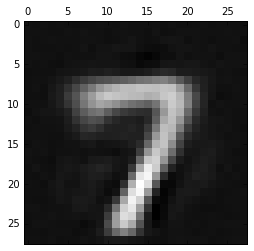

In [14]:
%matplotlib inline
plt.matshow(imgs1, cmap=plt.get_cmap('gray'))

<class 'numpy.ndarray'>
[[-0.50698227 -0.51297432 -0.50367695 -0.51000994 -0.50519419 -0.51339209
  -0.51554811 -0.50604331 -0.5067693  -0.50459212 -0.50868607 -0.51239765
  -0.49712259 -0.50763267 -0.50913203 -0.50545424 -0.50172752 -0.51243806
  -0.50423574 -0.51087248 -0.51263797 -0.50642312 -0.50207424 -0.50993943
  -0.50958002 -0.50859958 -0.5081861  -0.5125823  -0.50633091 -0.50579232
  -0.50720692 -0.51168048 -0.51220679 -0.50456995 -0.50833094 -0.49972695
  -0.50606889 -0.50623935 -0.51496649 -0.507891   -0.50271225 -0.5060429
  -0.5062502  -0.51754886 -0.49650544 -0.51733595 -0.51397556 -0.50300783
  -0.5031271  -0.5030874  -0.50725919 -0.50738275 -0.50819737 -0.50392747
  -0.5065254  -0.50956243 -0.50448424 -0.50984961 -0.50904399 -0.50479251
  -0.50706524 -0.50561136 -0.50718516 -0.50436139 -0.50364476 -0.50772405
  -0.51909626 -0.5119974  -0.50409806 -0.48873571 -0.50877982 -0.51554418
  -0.51128399 -0.49188906 -0.48798829 -0.49194551 -0.51670784 -0.50303847
  -0.50946277 -

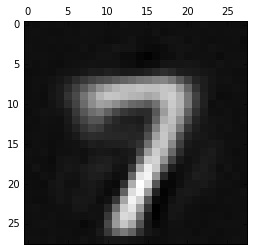

In [45]:
a=autoencoder_imgs[0,:]
a=np.reshape(a,(1,784))
print (type(a))
print (a)
autoencoder_imgs1=autoencoder.predict(a)
%matplotlib inline
plt.matshow(np.reshape(autoencoder_imgs1, (28, 28)), cmap=plt.get_cmap('gray'))

In [34]:
print (type (autoencoder_imgs))
print (autoencoder_imgs.shape)


<class 'numpy.ndarray'>
(10000, 784)


下面来画压缩成两维的点图

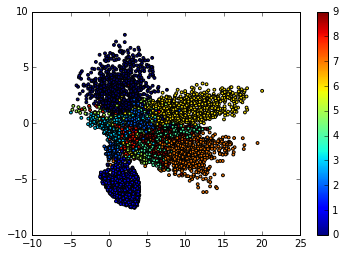

In [7]:
%matplotlib inline
label=np.array(y_test)
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=label,s=8)  
plt.colorbar()  
plt.show()  

In [8]:
encoded_imgs.shape

(10000, 2)

In [9]:
print (y_test[0:5])

[7 2 1 0 4]


In [11]:
decoded_imgs = autoencoder.predict(x_test)  

In [13]:
print (x_test[0])
print (decoded_imgs[0])

[-0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]


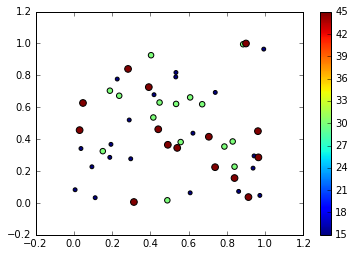

In [10]:
#画点图示范代码
%matplotlib inline
x = np.random.rand(50,30)  
label = list(np.ones(20))+list(2*np.ones(15))+list(3*np.ones(15))  
print (label)
label = np.array(label)  
plt.scatter(x[:,1],x[:,0],15.0*label,15.0*label)  
plt.colorbar()  
plt.show() 

In [ ]:
import numpy as np  
np.random.seed(1337)  # for reproducibility  
  
from keras.datasets import mnist  
from keras.models import Model #泛型模型  
from keras.layers import Dense, Input  
import matplotlib.pyplot as plt  
  
# X shape (60,000 28x28), y shape (10,000, )  
(x_train, _), (x_test, y_test) = mnist.load_data()  
  
# 数据预处理  
x_train = x_train.astype('float32') / 255. - 0.5       # minmax_normalized  
x_test = x_test.astype('float32') / 255. - 0.5         # minmax_normalized  
x_train = x_train.reshape((x_train.shape[0], -1))  
x_test = x_test.reshape((x_test.shape[0], -1))  
print(x_train.shape)  
print(x_test.shape)  
  
# 压缩特征维度至2维  
encoding_dim = 2  
  
# this is our input placeholder  
input_img = Input(shape=(784,))  
  
# 编码层  
encoded = Dense(128, activation='relu')(input_img)  
encoded = Dense(64, activation='relu')(encoded)  
encoded = Dense(10, activation='relu')(encoded)  
encoder_output = Dense(encoding_dim)(encoded)  
 
# 解码层  
decoded = Dense(10, activation='relu')(encoder_output)  
decoded = Dense(64, activation='relu')(decoded)  
decoded = Dense(128, activation='relu')(decoded)  
decoded = Dense(784, activation='tanh')(decoded)  
  
# 构建自编码模型  
autoencoder = Model(inputs=input_img, outputs=decoded)  
  
# 构建编码模型  
encoder = Model(inputs=input_img, outputs=encoder_output)  
  
# compile autoencoder  
autoencoder.compile(optimizer='adam', loss='mse')  
  
# training  
autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True)  
  
# plotting  
encoded_imgs = encoder.predict(x_test)  
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test, s=10)  
plt.colorbar()  
plt.show()  
